In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stratos Test Task: Analysis of Spreads Data

Let's load the dataset:

In [3]:
spread_data = pd.read_csv("Stratos_test_task_spreads.csv")

To understand the structure of the dataset, we will display its first few rows:

In [4]:
spread_data.head()

,quote_hour,symbol,avg_spread
0,2/12/2024 0:00,US30,4.8
1,2/12/2024 1:00,US30,4.8
2,2/12/2024 2:00,US30,4.8
3,2/12/2024 3:00,US30,4.8
4,2/12/2024 4:00,US30,4.8


In [5]:
spread_data.shape

(480, 3)

As we can see, the dataset contains **480 rows** and **3 columns**.

To ensure data quality, let's check for missing values in the dataset:

In [6]:
spread_data.isnull().sum()

quote_hour    0
symbol        0
avg_spread    2
dtype: int64

The `quote_hour` and `symbol` columns have no missing values. <br/>
The `avg_spread` column has 2 missing values, which need to be addressed to ensure the integrity of our analysis.

Here are the rows with missing values:

In [7]:
spread_data[spread_data['avg_spread'].isna()]

,quote_hour,symbol,avg_spread
450,2/22/2024 18:00,USD/JPY,NaN
462,2/23/2024 6:00,USD/JPY,NaN


To better understand the context, let's examine the rows immediately surrounding the missing values:

In [8]:
spread_data.loc[448:464]

,quote_hour,symbol,avg_spread
448,2/22/2024 16:00,USD/JPY,1.120000
449,2/22/2024 17:00,USD/JPY,1.100000
450,2/22/2024 18:00,USD/JPY,NaN
451,2/22/2024 19:00,USD/JPY,1.092512
452,2/22/2024 20:00,USD/JPY,1.173964
453,2/22/2024 21:00,USD/JPY,1.378556
454,2/22/2024 22:00,USD/JPY,4.708799
455,2/22/2024 23:00,USD/JPY,1.424043
456,2/23/2024 0:00,USD/JPY,1.248135
457,2/23/2024 1:00,USD/JPY,1.158532


Since we are working with time series data, and the values appear to be sequential with only one significant difference over this period, ве will fill the missing values using __linear interpolation__. This method smooths the gaps between consecutive values and creates a smooth transition between them.

In [9]:
spread_data['avg_spread'] = spread_data['avg_spread'].interpolate(method='linear')

After interpolation, the results are:

In [10]:
spread_data.loc[448:464]

,quote_hour,symbol,avg_spread
448,2/22/2024 16:00,USD/JPY,1.120000
449,2/22/2024 17:00,USD/JPY,1.100000
450,2/22/2024 18:00,USD/JPY,1.096256
451,2/22/2024 19:00,USD/JPY,1.092512
452,2/22/2024 20:00,USD/JPY,1.173964
453,2/22/2024 21:00,USD/JPY,1.378556
454,2/22/2024 22:00,USD/JPY,4.708799
455,2/22/2024 23:00,USD/JPY,1.424043
456,2/23/2024 0:00,USD/JPY,1.248135
457,2/23/2024 1:00,USD/JPY,1.158532


Next, let's verify the data types of the columns to ensure they are in the correct format.

In [11]:
spread_data.dtypes

quote_hour     object
symbol         object
avg_spread    float64
dtype: object

`quote_hour` is stored as text and will be converted to a datetime format. <br/>
`symbol` is stored as text, which is correct for categorical data. <br/>
`avg_spread` is a float, which is appropriate for numerical calculations. <br/>

To perform any time-based analysis (e.g., filtering, grouping, or extracting date/hour components), `quote_hour` must be converted to a proper datetime format:

In [12]:
spread_data['quote_hour'] = pd.to_datetime(spread_data['quote_hour'])

Extract the date and hour as a Separate Column:

In [13]:
spread_data['quote_date'] = spread_data['quote_hour'].dt.normalize()

spread_data['quote_hour'] = spread_data['quote_hour'].dt.hour

Organize the columns in a clear order:

In [14]:
spread_data = spread_data[['quote_date', 'quote_hour', 'symbol', 'avg_spread']]

In [15]:
spread_data

,quote_date,quote_hour,symbol,avg_spread
0,2024-02-12,0,US30,4.800000
1,2024-02-12,1,US30,4.800000
2,2024-02-12,2,US30,4.800000
3,2024-02-12,3,US30,4.800000
4,2024-02-12,4,US30,4.800000
...,...,...,...,...
475,2024-02-23,19,USD/JPY,1.103833
476,2024-02-23,20,USD/JPY,1.330962
477,2024-02-23,21,USD/JPY,1.577383
478,2024-02-25,22,USD/JPY,7.413133


Let's confirm that each column in spread_data has the correct data type:

In [16]:
spread_data.dtypes

quote_date    datetime64[ns]
quote_hour             int32
symbol                object
avg_spread           float64
dtype: object

In [17]:
spread_data['quote_date'].min(), spread_data['quote_date'].max()

(Timestamp('2024-02-12 00:00:00'), Timestamp('2024-02-25 00:00:00'))

The dataset covers a time range from February 12, 2024 to February 25, 2024, which corresponds to data collected exclusively during __February 2024__. This information allows us to focus our analysis on a specific and relatively short period, making it easier to observe patterns, trends, and anomalies within this timeframe.

In [18]:
spread_data.symbol.unique()

array(['US30', 'USD/JPY'], dtype=object)

In the dataset, we have two unique symbols: __US30__ and __USD/JPY__. This indicates that the data contains information for two different trading instruments: the US30 index (which is a major US stock market index) and the USD/JPY currency pair (representing the exchange rate between the US Dollar and the Japanese Yen).

Next, we'll group the data by the symbol column and examine the statistical summary of the avg_spread for each instrument:

In [19]:
symbol_stats = spread_data.groupby('symbol')['avg_spread'].describe()
symbol_stats.T

symbol,US30,USD/JPY
count,227.000000,253.000000
mean,3.757753,1.366240
std,1.023609,0.991857
min,2.300000,0.993543
25%,2.680000,1.120000
50%,3.780000,1.159056
75%,4.800000,1.190000
max,8.610000,9.770000


The dataset reveals that the average spread for US30 is approximately 3.76, with a standard deviation of 1.02, indicating moderate variability around the mean. The spread for US30 ranges from a minimum of 2.30 to a maximum of 8.61, highlighting substantial fluctuations. The spread's 25th percentile is 2.68, the 50th percentile (median) is 3.78, and the 75th percentile is 4.80. This suggests that 50% of the time, the spread lies within the range of 2.68 to 4.80.

For USD/JPY, the mean spread is 1.37, which is notably lower than that of US30. The standard deviation is 0.99, implying that the spread for USD/JPY is more stable. The range for USD/JPY is from 0.99 to 9.77, but the bulk of the data (25th to 75th percentiles) is concentrated between 1.12 and 1.19.

In conclusion, __USD/JPY__ is more stable with smaller fluctuations, while __US30__ has greater volatility, offering more potential for significant price changes. This greater volatility could lead to both higher profits and higher risks.

## Looking at the Trend of Average Spread Over Time

###  Trends in Average Spread by Date

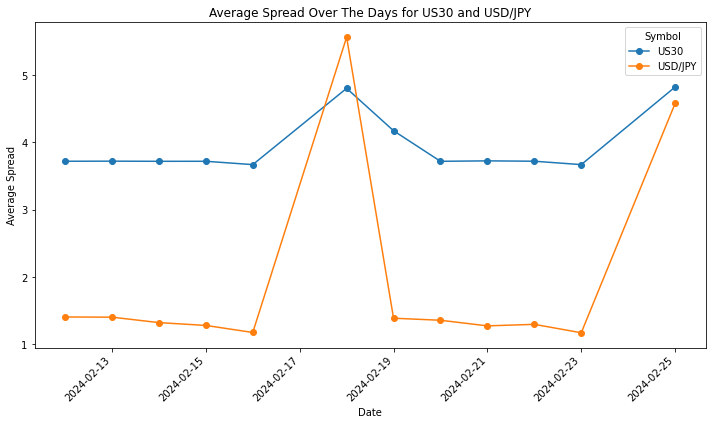

In [20]:
daily_spread_by_symbol = spread_data.groupby(['quote_date', 'symbol'])['avg_spread'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
daily_spread_by_symbol.plot(ax=ax, marker='o')  

ax.set_title("Average Spread Over The Days for US30 and USD/JPY")
ax.set_xlabel("Date")
ax.set_ylabel("Average Spread")

plt.xticks(rotation=45)

plt.legend(title="Symbol")

plt.tight_layout() 
plt.show()



From the __16th__ onward, US30 and USD/JPY start increasing. The peak for both symbols appears to have occurred on the __18th__, after which the USD/JPY, drops sharply, and then returns to levels similar to those before the peak. The US30, decreases more gradually until around the 20th. After that, both begin to rise again starting from the __23rd__.


In [21]:
dates_to_check = pd.to_datetime(['2024-02-16', '2024-02-18', '2024-02-19', '2024-02-23', '2024-02-25'])

days_of_week = dates_to_check.day_name()

for date, day in zip(dates_to_check, days_of_week):
    print(f"{date.strftime('%Y-%m-%d')} falls on {day}")


2024-02-16 falls on Friday
2024-02-18 falls on Sunday
2024-02-19 falls on Monday
2024-02-23 falls on Friday
2024-02-25 falls on Sunday


From the data, we can observe a potential trend: the spread values seem to start rising on Fridays and peak on Sundays, indicating that the __weekend__ may bring increased market volatility or fluctuations in the spread. This pattern is evident for both US30 and USD/JPY, where the highest spreads tend to occur on Sundays, with an increase beginning on Friday.

In [22]:
max_spread_info = spread_data.loc[spread_data.groupby('symbol')['avg_spread'].idxmax()]

max_spread_info

,quote_date,quote_hour,symbol,avg_spread
133,2024-02-19,18,US30,8.61
358,2024-02-18,22,USD/JPY,9.77


In fact, the peak for US30 occurred on February 19th, Monday at 18h, and the peak for USD/JPY occurred on February 18th, Sunday at 22h.

### Trends in Average Spread by Hour

Let's explore the trends over the hours by aggregating the average spread for each hour. This will help us understand how the spread behaves throughout the day and how it varies between different symbols.

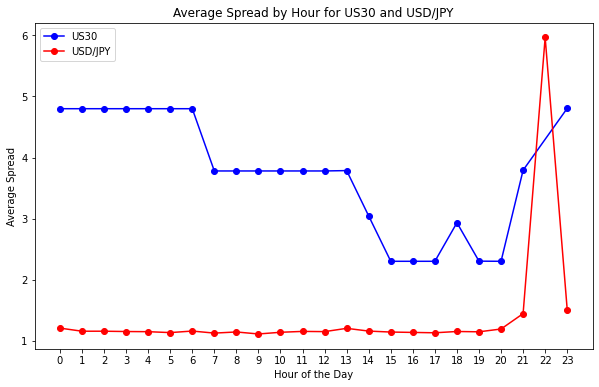

In [23]:
us30_hourly_avg = spread_data[spread_data['symbol'] == 'US30'].groupby('quote_hour')['avg_spread'].mean()
usdjpy_hourly_avg = spread_data[spread_data['symbol'] == 'USD/JPY'].groupby('quote_hour')['avg_spread'].mean()

plt.figure(figsize=(10,6))

plt.plot(np.array(us30_hourly_avg.index), np.array(us30_hourly_avg), label='US30', color='blue', marker='o')

plt.plot(np.array(usdjpy_hourly_avg.index), np.array(usdjpy_hourly_avg), label='USD/JPY', color='red', marker='o')

plt.title('Average Spread by Hour for US30 and USD/JPY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spread')
plt.xticks(range(0, 24))  
plt.legend()

plt.show()

The chart shows the average spread (difference between bid and ask prices) for US30 and USD/JPY at different hours of the day.

US30 (blue line): The spread remains stable around 5 during the early hours (0-6). It starts to decrease and stabilizes around 4 between 7 and 19 hours. Towards the end of the day (20-23 hours), there is a slight increase in the spread.

USD/JPY (red line): The spread remains relatively stable around 1 for most of the day. However, at the end of the day (21-23 hours), there is a sharp increase in the spread, peaking above 6 before dropping again.

Conclusion: For both symbols, the spread remains __stable during the day__, but there are __sharp changes__ toward __the end of the day__, particularly for USD/JPY.

In [24]:
def plot_hourly_average_spread(spread_data, date):
    """
    Function to plot the hourly average spreads for US30 and USD/JPY on a specific date.

    :param spread_data: DataFrame containing data with 'quote_date', 'quote_hour', 'symbol', 'avg_spread' values
    :param date: The date for which the analysis should be performed, in the format 'YYYY-MM-DD'
    """
    filtered_data = spread_data[spread_data['quote_date'] == date]

    us30_hourly_avg = filtered_data[filtered_data['symbol'] == 'US30'].groupby('quote_hour')['avg_spread'].mean()
    usdjpy_hourly_avg = filtered_data[filtered_data['symbol'] == 'USD/JPY'].groupby('quote_hour')['avg_spread'].mean()

    plt.figure(figsize=(10,6))

    plt.plot(np.array(us30_hourly_avg.index), np.array(us30_hourly_avg), label='US30', color='blue', marker='o')

    plt.plot(np.array(usdjpy_hourly_avg.index), np.array(usdjpy_hourly_avg), label='USD/JPY', color='red', marker='o')

    plt.title(f'Average Spread by Hour for US30 and USD/JPY on {date}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Spread')
    plt.xticks(range(0, 24))  
    plt.legend()

    plt.show()


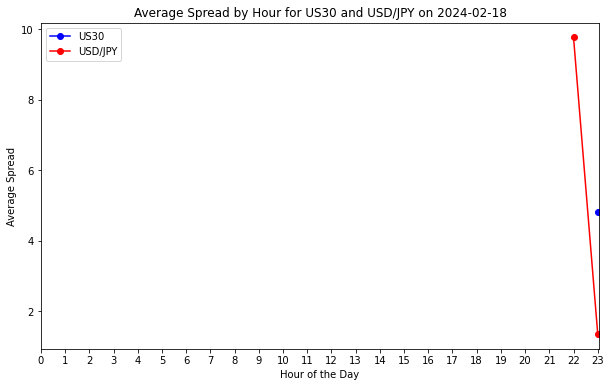

In [25]:
plot_hourly_average_spread(spread_data, '2024-02-18')

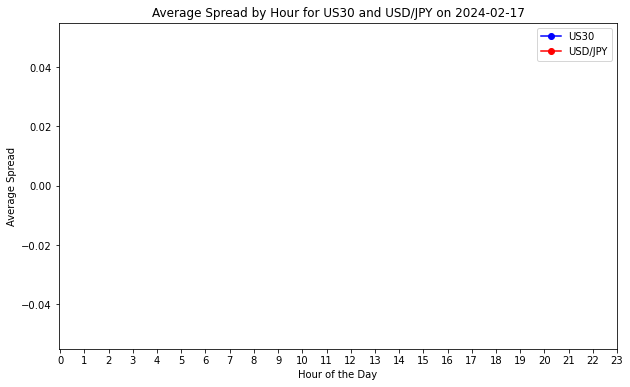

In [26]:
plot_hourly_average_spread(spread_data, '2024-02-17')

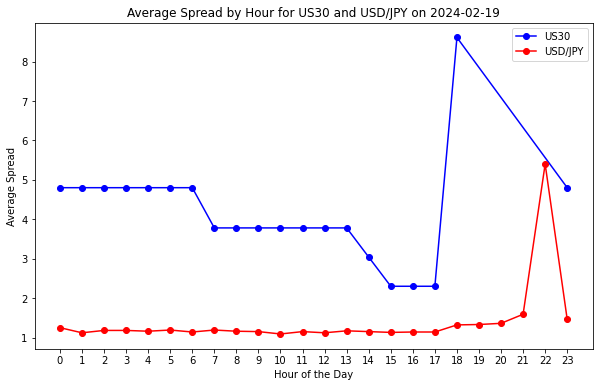

In [27]:
plot_hourly_average_spread(spread_data, '2024-02-19')

In [28]:
spread_data[spread_data['quote_date'] == '2024-02-17']

,quote_date,quote_hour,symbol,avg_spread


In [29]:
spread_data[spread_data['quote_date'] == '2024-02-18']

,quote_date,quote_hour,symbol,avg_spread
114,2024-02-18,23,US30,4.80
358,2024-02-18,22,USD/JPY,9.77
359,2024-02-18,23,USD/JPY,1.35


In [30]:
spread_data[spread_data['quote_date'] == '2024-02-19']

,quote_date,quote_hour,symbol,avg_spread
115,2024-02-19,0,US30,4.80
116,2024-02-19,1,US30,4.80
117,2024-02-19,2,US30,4.80
118,2024-02-19,3,US30,4.80
119,2024-02-19,4,US30,4.80
120,2024-02-19,5,US30,4.80
121,2024-02-19,6,US30,4.80
122,2024-02-19,7,US30,3.78
123,2024-02-19,8,US30,3.78
124,2024-02-19,9,US30,3.78


In some days, there are no data records, such as on the 17th of February, while on the 18th, there are only 3 records. In contrast, other days have complete data entries for every hour.

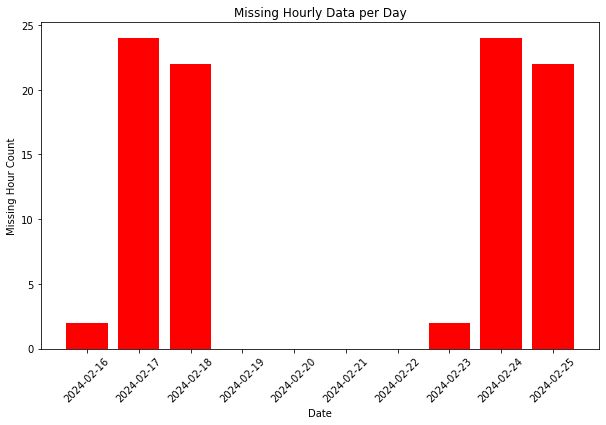

In [31]:
date_range = pd.date_range(start='2024-02-12', end='2024-02-25', freq='D')

hours = range(24)

all_combinations = pd.DataFrame(
    [(date, hour) for date in date_range for hour in hours],
    columns=['quote_date', 'quote_hour']
)

merged_data = pd.merge(all_combinations, spread_data[['quote_date', 'quote_hour']], 
                       on=['quote_date', 'quote_hour'], how='left', indicator=True)

missing_data = merged_data[merged_data['_merge'] == 'left_only']

missing_counts = missing_data.groupby('quote_date').size()

plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values, color='red')
plt.title('Missing Hourly Data per Day')
plt.xlabel('Date')
plt.ylabel('Missing Hour Count')
plt.xticks(rotation=45)
plt.show()


By merging the full list of expected date-hour combinations (all_combinations) with our original data (spread_data), we can easily detect and visualize missing hours or days. 

### Correlation Between Symbols (US30 vs. USD/JPY)

In [32]:
merged_data = pd.merge(us30_hourly_avg, usdjpy_hourly_avg, left_index=True, right_index=True, suffixes=('_US30', '_USDJPY'))

correlation = merged_data.corr().iloc[0, 1]
print(f"Pearson correlation between US30 and USD/JPY spread: {correlation}")


Pearson correlation between US30 and USD/JPY spread: 0.22141289284771493


Correlation between the spreads of US30 and USD/JPY is approximately __0.22__. This indicates a weak positive linear relationship between the two symbols' spreads. As a result, while there is a slight tendency for the spreads to move in the same direction, the relationship is not strong enough to suggest that the changes in one spread significantly influence the other. 

### Volatility Analysis for US30 and USD/JPY

In [33]:
spread_data['return'] = spread_data.groupby('symbol')['avg_spread'].pct_change() * 100

# Calculate volatility (standard deviation of returns) for each symbol
us30_volatility = spread_data[spread_data['symbol'] == 'US30']['return'].std()
usdjpy_volatility = spread_data[spread_data['symbol'] == 'USD/JPY']['return'].std()

print(f"Volatility for US30: {us30_volatility}")
print(f"Volatility for USD/JPY: {usdjpy_volatility}")

Volatility for US30: 24.51287285195712
Volatility for USD/JPY: 65.50797057231895


__US30 Volatility: 24.51%__

This means that the daily percentage change in the average spread for the US30 index fluctuates within a range of ±24.51% around its mean, indicating a relatively moderate level of variability.


__USD/JPY Volatility: 65.51%__

The volatility for the USD/JPY currency pair is much higher, with the average spread fluctuating by ±65.51% around its mean. This suggests that the USD/JPY pair has more significant daily fluctuations compared to the US30 index, which may reflect higher market uncertainty or external factors influencing the currency pair.

__Interpretation__: <br/>
The US30 (a major stock index) shows moderate volatility, which is typical for stock indices that tend to experience more stable price movements in comparison to currencies. <br/>
The USD/JPY pair, being a forex instrument, displays higher volatility, which is common in currency markets, especially with significant fluctuations in exchange rates, influenced by various economic and geopolitical factors.

Let's calculate the __rolling standard deviation__ for the percentage changes of each instrument using a __window of 5 hours__. This helps understand how the volatility fluctuates over time.

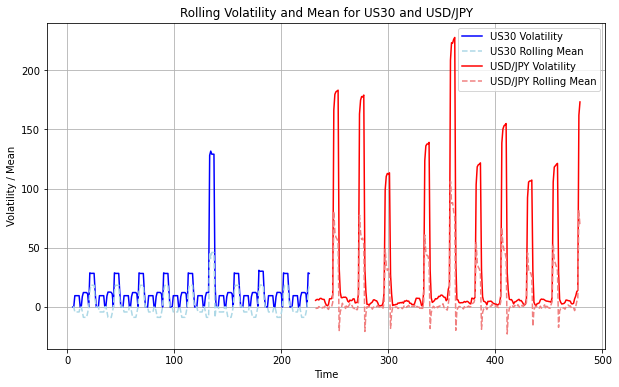

In [34]:
# Calculate the returns (percentage change) for both symbols
spread_data['us30_return'] = spread_data[spread_data['symbol'] == 'US30']['avg_spread'].pct_change() * 100
spread_data['usdjpy_return'] = spread_data[spread_data['symbol'] == 'USD/JPY']['avg_spread'].pct_change() * 100

# Calculate rolling volatility for a specific window (e.g., 5 hours)
spread_data['rolling_volatility_us30'] = spread_data['us30_return'].rolling(window=5).std()
spread_data['rolling_volatility_usdjpy'] = spread_data['usdjpy_return'].rolling(window=5).std()

# Calculate rolling mean for a specific window (e.g., 5 hours)
spread_data['rolling_mean_us30'] = spread_data['us30_return'].rolling(window=5).mean()
spread_data['rolling_mean_usdjpy'] = spread_data['usdjpy_return'].rolling(window=5).mean()

# Plot the rolling volatility and rolling mean
plt.figure(figsize=(10, 6))

# Plot for US30 volatility and rolling mean
plt.plot(spread_data['rolling_volatility_us30'], label='US30 Volatility', color='blue')
plt.plot(spread_data['rolling_mean_us30'], label='US30 Rolling Mean', color='lightblue', linestyle='--')

plt.plot(spread_data['rolling_volatility_usdjpy'], label='USD/JPY Volatility', color='red')
plt.plot(spread_data['rolling_mean_usdjpy'], label='USD/JPY Rolling Mean', color='lightcoral', linestyle='--')

plt.title('Rolling Volatility and Mean for US30 and USD/JPY')
plt.xlabel('Time')
plt.ylabel('Volatility / Mean')
plt.legend()
plt.grid(True)

plt.show()


Based on the chart, both US30 and USD/JPY exhibit periods of high volatility, indicating significant price fluctuations over short timeframes. These fluctuations may be attributed to various factors such as news events, economic indicators, or broader market sentiment. Additionally, the average values of both instruments show changes over time, suggesting shifting overall price trends.

### Identifying spikes in the spread (e.g., 2 standard deviations above the mean)

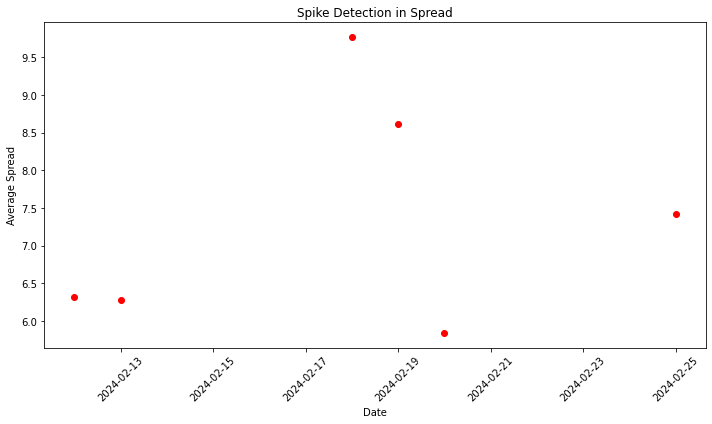

In [35]:
spread_mean = spread_data['avg_spread'].mean()
spread_std = spread_data['avg_spread'].std()
threshold = spread_mean + 2 * spread_std

spikes = spread_data[spread_data['avg_spread'] > threshold]

plt.figure(figsize=(10, 6))
plt.scatter(spikes['quote_date'], spikes['avg_spread'], color='red')
plt.title("Spike Detection in Spread")
plt.xlabel("Date")
plt.ylabel("Average Spread")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [39]:
us30_mean_spread = spread_data[spread_data["symbol"] == "US30"]["avg_spread"]

usd_jpy_symbols_mean_spread = spread_data[spread_data["symbol"] == "USD/JPY"]["avg_spread"]


print(f"Min avg_spread for US30: {us30_mean_spread.min()}")
print(f"Min avg_spread for USD/JPY: {usd_jpy_symbols_mean_spread.min()}")
print()
print(f"Mean avg_spread for US30: {us30_mean_spread.mean()}")
print(f"Mean avg_spread for USD/JPY: {usd_jpy_symbols_mean_spread.mean()}")
print()
print(f"Max avg_spread for US30: {us30_mean_spread.max()}")
print(f"Max avg_spread for USD/JPY: {usd_jpy_symbols_mean_spread.max()}")


Min avg_spread for US30: 2.3
Min avg_spread for USD/JPY: 0.9935426

Mean avg_spread for US30: 3.7577533039647575
Mean avg_spread for USD/JPY: 1.3662400608320158

Max avg_spread for US30: 8.61
Max avg_spread for USD/JPY: 9.77


In [37]:
us30_mean_spread.mean() + 2 * us30_mean_spread.std()

5.804970946051498

In [40]:
us30_mean_spread.mean() - 2 * us30_mean_spread.std()

1.7105356618780165

#### To monitor the spreads effectively, I propose the following alert mechanisms:

Dynamic thresholds for US30 and USD/JPY:

US30:

Alert if spread exceeds: `us30_mean_spread.mean() + 2 * us30_mean_spread.std()` <br/>
Alert if spread falls below: `us30_mean_spread.mean() - 2 * us30_mean_spread.std()`

USD/JPY:

Alert if spread exceeds: `usd_jpy_symbols_mean_spread.mean() + 2 * usd_jpy_symbols_mean_spread.std()`
Alert if spread falls below: `usd_jpy_symbols_mean_spread.mean() - 2 * usd_jpy_symbols_mean_spread.std()`

Additional Considerations:

Visualizations: Plotting the average spread with the thresholds can help you visualize the alert zones. <br/>
Backtesting: You can backtest your alert system on historical data to see how it would have performed. <br/>
Monitoring: Continuously monitor the spread and trigger alerts when the thresholds are breached.

## Summary and Key Findings

In conclusion, the dataset highlights that USD/JPY exhibits a more stable spread with smaller fluctuations compared to US30. While US30 demonstrates higher volatility, this can present greater opportunities for profits, albeit with increased risks. The spread trends also indicate that volatility tends to increase toward the end of the week, particularly on Sundays, with notable peak values observed during these times. These insights can inform trading strategies and decision-making, depending on the trader's risk tolerance and trading goals. Traders who prioritize stability may prefer trading USD/JPY due to its consistent spread, while those seeking higher potential returns, along with the corresponding risk, might consider US30. Additionally, the increased volatility observed towards the end of the week suggests that strategic timing could be crucial for maximizing opportunities or minimizing risks.